# 보스턴 집값 예측하기

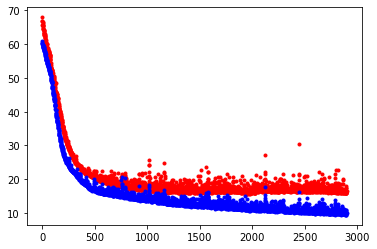

실제가격: 22.600, 예상가격: 23.851
실제가격: 50.000, 예상가격: 25.965
실제가격: 23.000, 예상가격: 22.355
실제가격: 8.300, 예상가격: 9.288
실제가격: 21.200, 예상가격: 20.392
실제가격: 19.900, 예상가격: 21.181
실제가격: 20.600, 예상가격: 20.167
실제가격: 18.700, 예상가격: 21.420
실제가격: 16.100, 예상가격: 18.133
실제가격: 18.600, 예상가격: 12.622
실제가격: 8.800, 예상가격: 55.464
실제가격: 17.200, 예상가격: 11.180
실제가격: 14.900, 예상가격: 15.346
실제가격: 10.500, 예상가격: 8.565
실제가격: 50.000, 예상가격: 48.585
실제가격: 29.000, 예상가격: 30.619
실제가격: 23.000, 예상가격: 20.117
실제가격: 33.300, 예상가격: 36.165
실제가격: 29.400, 예상가격: 30.428
실제가격: 21.000, 예상가격: 22.222
실제가격: 23.800, 예상가격: 22.118
실제가격: 19.100, 예상가격: 16.211
실제가격: 20.400, 예상가격: 18.168
실제가격: 29.100, 예상가격: 23.070
실제가격: 19.300, 예상가격: 22.781
실제가격: 23.100, 예상가격: 11.726
실제가격: 19.600, 예상가격: 18.589
실제가격: 19.400, 예상가격: 12.352
실제가격: 38.700, 예상가격: 36.620
실제가격: 18.700, 예상가격: 17.741
실제가격: 14.600, 예상가격: 13.067
실제가격: 20.000, 예상가격: 15.690
실제가격: 20.500, 예상가격: 18.362
실제가격: 20.100, 예상가격: 20.106
실제가격: 23.600, 예상가격: 22.950
실제가격: 16.800, 예상가격: 16.112
실제가격: 5.600, 예상가격: 8.731
실제가격: 5

In [2]:
#-*- coding: utf-8 -*-
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv("../dataset/housing.csv", delim_whitespace=True, header=None)

#print(df.info())
#print(df.head())

dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=3000, batch_size=50, verbose=0)

model_vloss = history.history['val_loss'][100:]
model_loss = history.history['loss'][100:]
x_len = numpy.arange(len(model_loss))

plt.plot(x_len, model_vloss, "o", c="red", markersize=3)
plt.plot(x_len, model_loss, "o", c="blue", markersize=3)

plt.show()

Y_prediction = model.predict(X_test).flatten()

for i in range(100):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))







In [115]:
model_vloss[-1]

10.670110702514648

In [ ]:

11.87840747833252















In [113]:

model_vloss[-4]



12.321508407592773